In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/after_up_ETH0.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,ETH,up,2017-03-16 09:00:07,coinstats,0,0,#Ethereum #ETH,Ethereum - ETH Price: $40.9373 Change in 1h: +...
1,ETH,up,2017-03-16 09:00:07,EthereumPrice_,3,0,#Ethereum,#Ethereum: Ether Price Index 1 ETH =0.032897Ƀ ...
2,ETH,up,2017-03-16 09:00:33,coinstats,0,0,#Ethereum #ETC,Ethereum Classic - ETC Price: $1.95712 Change ...
3,ETH,up,2017-03-16 09:01:54,newsbitcoininfo,0,0,#bitcoin #bitcoin,Analysis: Has Ethereum Reached its Peak? Here ...
4,ETH,up,2017-03-16 09:01:58,bitcoinagile,0,0,#ethereum #bitcoin #bitcoin,Analysis: Has #ethereum Reached its Peak? Here...
...,...,...,...,...,...,...,...,...
585,ETH,up,2017-03-16 14:54:11,thebigresearch,0,0,NaN,Ethereum Price Tear Continues With New All-Tim...
586,ETH,up,2017-03-16 14:56:57,CoinDesk,9,14,NaN,Ethereum Price Tear Continues With New All-Tim...
587,ETH,up,2017-03-16 14:57:08,GacetaMadrid,0,0,#dinero,Ethereum: el adversario mortal del Bitcoin - #...
588,ETH,up,2017-03-16 14:58:38,BlackBullTradn,0,0,NaN,coindesk: Ethereum Price Tear Continues With N...


In [4]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=x ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [5]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [6]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
text['text']

0      [ethereum, eth, price, :, $, 40.9373, change, ...
1      [ethereum, :, ether, price, index, 1, eth, =0....
2      [ethereum, classic, etc, price, :, $, 1.95712,...
3      [analysis, :, has, ethereum, reached, its, pea...
4      [analysis, :, has, ethereum, reached, its, pea...
                             ...                        
585    [ethereum, price, tear, continues, with, new, ...
586    [ethereum, price, tear, continues, with, new, ...
587    [ethereum, :, el, adversario, mortal, del, bit...
588    [coindesk, :, ethereum, price, tear, continues...
589    [blockchannel, :, ethereum, price, tear, conti...
Name: text, Length: 590, dtype: object

In [8]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
text['text']

0      [ethereum, eth, price, :, $, change, :, +, %, ...
1      [ethereum, :, price, index, eth, =0.032897ƀ, x...
2      [ethereum, classic, etc, price, :, $, change, ...
3      [analysis, :, ethereum, reached, peak, ?, cryp...
4      [analysis, :, ethereum, reached, peak, ?, cryp...
                             ...                        
585    [ethereum, price, tear, continues, new, time, ...
586    [ethereum, price, tear, continues, new, time, ...
587    [ethereum, :, el, adversario, mortal, del, bit...
588    [:, ethereum, price, tear, continues, new, tim...
589    [blockchannel, :, ethereum, price, tear, conti...
Name: text, Length: 590, dtype: object

In [13]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [18]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [19]:
article_contents = tokenized_doc.values.tolist()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [21]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [22]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [23]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [24]:
word2id = defaultdict(lambda: 0)

In [25]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [26]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [27]:
len(tf_idf_result)

1213

In [28]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

1213


In [29]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [30]:
sentences = article_contents

In [31]:
from gensim.models import Word2Vec

In [32]:
model = Word2Vec(sentences, min_count=1)

In [33]:
len(model.wv.vocab)

1213

In [34]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [35]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [36]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [37]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [38]:
temp_cluster_result['cluster'] = assigned_clusters

In [39]:
temp_cluster_result['raw_data'] = X.tolist()

In [40]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [41]:
from sklearn.metrics import pairwise_distances

In [42]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [43]:
len(cosine_centroid_list)

1213

In [44]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [45]:
sum(temp_distance[3])

469.17683917931333

In [46]:
import scipy.spatial.distance as dist

In [47]:
dist.cosine(X[0],cosine_centroid_list[0])

0.018660557299496783

In [48]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.1680437054056258

In [49]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [50]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [51]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 긍정 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
703,"[0.0007087605190463364, 0.003394699888303876, ...",hand,0,"[0.0002768233, -0.00028943698, 0.0005669647, -...",0.560271,0.002339,1.557932,NaN
953,"[-0.00019516445172484964, 0.000916742894332855...",l'ethereum,0,"[0.0002768233, -0.00028943698, 0.0005669647, -...",0.565369,0.001169,1.564200,NaN
1118,"[-0.0014421687228605151, -0.003675957676023245...",simondlr,0,"[0.0002768233, -0.00028943698, 0.0005669647, -...",0.572809,0.001169,1.571640,NaN
550,"[0.003893471322953701, -0.001983484486117959, ...",cdoelle,0,"[0.0002768233, -0.00028943698, 0.0005669647, -...",0.613099,0.001169,1.611930,NaN
396,"[0.004314156714826822, -0.001199550461024046, ...",sybn,0,"[0.0002768233, -0.00028943698, 0.0005669647, -...",0.616256,0.001169,1.615087,NaN
897,"[-8.776068716542795e-05, -0.001715164748020470...",everyday,0,"[0.0002768233, -0.00028943698, 0.0005669647, -...",0.621911,0.001169,1.620741,NaN
824,"[-9.809298353502527e-05, 0.004930876661092043,...",goog,0,"[0.0002768233, -0.00028943698, 0.0005669647, -...",0.624836,0.001169,1.623667,NaN
1159,"[0.001413775491528213, -0.002350104972720146, ...",призвал,0,"[0.0002768233, -0.00028943698, 0.0005669647, -...",0.636259,0.001169,1.635089,NaN
1002,"[-0.003465935355052352, 0.0015063429018482566,...",drive,0,"[0.0002768233, -0.00028943698, 0.0005669647, -...",0.638917,0.001169,1.637748,NaN
1066,"[0.002851131372153759, 0.005228412803262472, -...",significant,0,"[0.0002768233, -0.00028943698, 0.0005669647, -...",0.643211,0.002339,1.640873,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 거래소 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
0,"[0.014619407244026661, 0.008514377288520336, -...",ethereum,1,"[0.00083148, 0.0006303039, -0.0020024516, -0.0...",0.018661,0.851292,0.167369,NaN
1,"[0.004128587897866964, 0.0005095367087051272, ...",price,1,"[0.00083148, 0.0006303039, -0.0020024516, -0.0...",0.074979,0.299355,0.775624,NaN
14,"[0.00960230641067028, 0.003890484804287553, -0...",bitcoin,1,"[0.00083148, 0.0006303039, -0.0020024516, -0.0...",0.045219,0.211654,0.833566,NaN
21,"[0.001039176364429295, 0.005176854785531759, -...",blockchain,1,"[0.00083148, 0.0006303039, -0.0020024516, -0.0...",0.048055,0.121613,0.926442,NaN
3,"[0.0022176303900778294, 0.005045983474701643, ...",market,1,"[0.00083148, 0.0006303039, -0.0020024516, -0.0...",0.141725,0.175404,0.966322,NaN
12,"[0.006232556886970997, 0.0037953173741698265, ...",cryptocurrency,1,"[0.00083148, 0.0006303039, -0.0020024516, -0.0...",0.068982,0.079516,0.989466,NaN
89,"[0.0026376601308584213, 0.0019765414763242006,...",dash,1,"[0.00083148, 0.0006303039, -0.0020024516, -0.0...",0.071325,0.032742,1.038583,NaN
16,"[0.0031639861408621073, -0.001699620159342885,...",high,1,"[0.00083148, 0.0006303039, -0.0020024516, -0.0...",0.152240,0.091210,1.061030,NaN
471,"[0.0011209461372345686, 2.6870322471950203e-05...",news,1,"[0.00083148, 0.0006303039, -0.0020024516, -0.0...",0.117994,0.052621,1.065373,NaN
99,"[-0.0007601354154758155, 0.0018667152617126703...",scheme,1,"[0.00083148, 0.0006303039, -0.0020024516, -0.0...",0.097152,0.028065,1.069087,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
821,"[0.0012382208369672298, 0.0014912303304299712,...",protect,2,"[0.0005029381, -0.0004245683, -0.00041244636, ...",0.524673,0.001169,1.523504,NaN
857,"[0.0018877873662859201, 0.0035403731744736433,...",достигла,2,"[0.0005029381, -0.0004245683, -0.00041244636, ...",0.573504,0.001169,1.572335,NaN
1166,"[-0.000458252034150064, -0.0005745925009250641...",credit,2,"[0.0005029381, -0.0004245683, -0.00041244636, ...",0.592334,0.002339,1.589996,NaN
98,"[-0.003938577603548765, -0.0009146127849817276...",public,2,"[0.0005029381, -0.0004245683, -0.00041244636, ...",0.606342,0.005847,1.600495,NaN
244,"[0.00013548579590860754, 0.005355389788746834,...",world,2,"[0.0005029381, -0.0004245683, -0.00041244636, ...",0.614246,0.004677,1.609569,NaN
635,"[0.005059871822595596, -0.0017889355076476932,...",inflection,2,"[0.0005029381, -0.0004245683, -0.00041244636, ...",0.621203,0.001169,1.620033,NaN
1136,"[-0.0019847780931741, -0.00354379927739501, -5...",esperto,2,"[0.0005029381, -0.0004245683, -0.00041244636, ...",0.625030,0.001169,1.623860,NaN
1194,"[-0.002065260661765933, -0.0003025576006621122...",large,2,"[0.0005029381, -0.0004245683, -0.00041244636, ...",0.636663,0.002339,1.634325,NaN
742,"[0.005581994075328112, 0.0011258659651502967, ...",predefined,2,"[0.0005029381, -0.0004245683, -0.00041244636, ...",0.638278,0.002339,1.635939,NaN
548,"[0.0003621421055868268, -0.004507820587605238,...",bullet,2,"[0.0005029381, -0.0004245683, -0.00041244636, ...",0.641223,0.001169,1.640053,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
916,"[0.0007666067103855312, -0.0001053669111570343...",conference,3,"[-2.8518305e-05, 0.0007416311, -0.0012132986, ...",0.521098,0.002339,1.518759,NaN
561,"[-0.001804911531507969, 0.000460062175989151, ...",register,3,"[-2.8518305e-05, 0.0007416311, -0.0012132986, ...",0.531017,0.001169,1.529848,NaN
76,"[-0.00010337609273847193, 0.005041969940066338...",solidity,3,"[-2.8518305e-05, 0.0007416311, -0.0012132986, ...",0.545080,0.005847,1.539233,NaN
1001,"[0.002918864134699106, 0.0008327405084855855, ...",insider,3,"[-2.8518305e-05, 0.0007416311, -0.0012132986, ...",0.566012,0.001169,1.564843,NaN
436,"[-0.004349755123257637, 0.004405148793011904, ...",meroket,3,"[-2.8518305e-05, 0.0007416311, -0.0012132986, ...",0.581776,0.001169,1.580606,NaN
684,"[-0.0002978056145366281, -0.002359057078137994...",toepassingen,3,"[-2.8518305e-05, 0.0007416311, -0.0012132986, ...",0.597605,0.001169,1.596436,NaN
836,"[0.0042347474955022335, -0.0012632838916033506...",cryptocurrencies,3,"[-2.8518305e-05, 0.0007416311, -0.0012132986, ...",0.599959,0.003508,1.596451,NaN
1139,"[-0.003035350702702999, 0.003515236545354128, ...",amare,3,"[-2.8518305e-05, 0.0007416311, -0.0012132986, ...",0.621808,0.002339,1.619469,NaN
1196,"[-0.001614588894881308, 0.00185347197111696, -...",involve,3,"[-2.8518305e-05, 0.0007416311, -0.0012132986, ...",0.631013,0.002339,1.628674,NaN
772,"[-0.00035446370020508766, 0.003262515412643552...",soyons,3,"[-2.8518305e-05, 0.0007416311, -0.0012132986, ...",0.633535,0.001169,1.632366,NaN


In [55]:
y_km = temp_cluster_result['cluster'].values

In [56]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

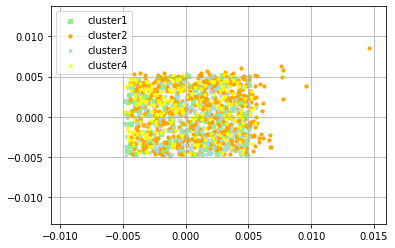

In [57]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 긍정

230

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 거래소

562

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 비즈

200

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 인플

221

In [62]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [63]:
#temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [64]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 1 # 긍정

In [65]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 12 # 거래소

In [66]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 7 # 비즈

In [67]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 6 # 인플

In [68]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [69]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [70]:
kmeans.inertia_

1.0392961502075195

In [71]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[2 2 2 ... 1 1 1]


In [72]:
cluster_values= list(model.wv.vocab)

In [73]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-1.0392961502075195


In [74]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [75]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.018176485


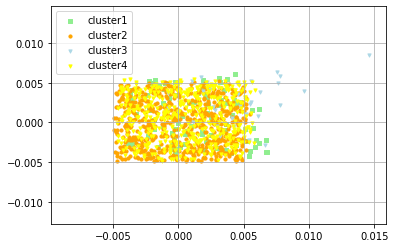

In [76]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [77]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [78]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [79]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [80]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [81]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [82]:
import scipy.spatial.distance as dist

In [83]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [84]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [85]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
161,"[-0.0020319742616266012, -0.000166051933774724...",altcoin,0,"[0.001385431, 0.0006124907, -0.0038709498, -0....",0.035716,0.127460,0.908256,NaN
469,"[0.0036712009459733963, 0.0024373717606067657,...",darling,0,"[0.001385431, 0.0006124907, -0.0038709498, -0....",0.031233,0.120444,0.910789,NaN
470,"[-1.2747002983815037e-05, -4.55043300462421e-0...",percent,0,"[0.001385431, 0.0006124907, -0.0038709498, -0....",0.035103,0.108750,0.926353,NaN
9,"[-0.0002505480661056936, 0.0051143658347427845...",analysis,0,"[0.001385431, 0.0006124907, -0.0038709498, -0....",0.031837,0.035081,0.996756,NaN
172,"[0.0018421513959765434, 0.0046706413850188255,...",record,0,"[0.001385431, 0.0006124907, -0.0038709498, -0....",0.028446,0.031573,0.996874,NaN
165,"[0.0024917598348110914, -0.0016007492085918784...",fintech,0,"[0.001385431, 0.0006124907, -0.0038709498, -0....",0.029935,0.031573,0.998362,NaN
11,"[0.00010746035695774481, -0.003054015571251511...",peak,0,"[0.001385431, 0.0006124907, -0.0038709498, -0....",0.036112,0.035081,1.001031,NaN
13,"[-0.0036632907576858997, 0.0033901247661560774...",watch,0,"[0.001385431, 0.0006124907, -0.0038709498, -0....",0.032419,0.030403,1.002016,NaN
366,"[-0.0011523512657731771, 0.0025015310384333134...",tear,0,"[0.001385431, 0.0006124907, -0.0038709498, -0....",0.033341,0.023387,1.009953,NaN
7,"[-0.0005133043159730732, -0.001288925763219595...",last,0,"[0.001385431, 0.0006124907, -0.0038709498, -0....",0.031239,0.019879,1.011360,NaN


In [86]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(50,'score') # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
919,"[-0.000881166837643832, 0.0030500367283821106,...",twitter,1,"[0.0001756858, -8.1310835e-05, -0.00026350003,...",0.028169,0.009355,1.018814,NaN
107,"[-0.002046759007498622, 0.0017983217258006334,...",status,1,"[0.0001756858, -8.1310835e-05, -0.00026350003,...",0.027999,0.005847,1.022152,NaN
283,"[-0.004322458524256945, 0.003233372000977397, ...",value,1,"[0.0001756858, -8.1310835e-05, -0.00026350003,...",0.026995,0.003508,1.023487,NaN
24,"[1.9732207874767482e-05, -0.002420626813545823...",beginner,1,"[0.0001756858, -8.1310835e-05, -0.00026350003,...",0.027301,0.003508,1.023793,NaN
331,"[0.0020808042027056217, 0.001853801659308374, ...",scooblr,1,"[0.0001756858, -8.1310835e-05, -0.00026350003,...",0.026306,0.002339,1.023967,NaN
420,"[0.0031733172945678234, -0.004178576171398163,...",wake,1,"[0.0001756858, -8.1310835e-05, -0.00026350003,...",0.026442,0.002339,1.024103,NaN
355,"[-0.0005612259265035391, 0.0015653253067284822...",malaysia,1,"[0.0001756858, -8.1310835e-05, -0.00026350003,...",0.027672,0.003508,1.024163,NaN
1157,"[0.0033263475634157658, -0.00350828911177814, ...",benefit,1,"[0.0001756858, -8.1310835e-05, -0.00026350003,...",0.025382,0.001169,1.024212,NaN
347,"[-0.0025047650560736656, 0.0027053840458393097...",chart,1,"[0.0001756858, -8.1310835e-05, -0.00026350003,...",0.026575,0.002339,1.024236,NaN
163,"[-0.0005104531301185489, -0.004336784593760967...",check,1,"[0.0001756858, -8.1310835e-05, -0.00026350003,...",0.026586,0.002339,1.024247,NaN


In [87]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
0,"[0.014619407244026661, 0.008514377288520336, -...",ethereum,2,"[0.0044916077, 0.0025917408, -0.007360503, -0....",0.123651,0.851292,0.272359,NaN
1,"[0.004128587897866964, 0.0005095367087051272, ...",price,2,"[0.0044916077, 0.0025917408, -0.007360503, -0....",0.038507,0.299355,0.739151,NaN
14,"[0.00960230641067028, 0.003890484804287553, -0...",bitcoin,2,"[0.0044916077, 0.0025917408, -0.007360503, -0....",0.047830,0.211654,0.836176,NaN
3,"[0.0022176303900778294, 0.005045983474701643, ...",market,2,"[0.0044916077, 0.0025917408, -0.007360503, -0....",0.031363,0.175404,0.855959,NaN
21,"[0.001039176364429295, 0.005176854785531759, -...",blockchain,2,"[0.0044916077, 0.0025917408, -0.007360503, -0....",0.044027,0.121613,0.922414,NaN
16,"[0.0031639861408621073, -0.001699620159342885,...",high,2,"[0.0044916077, 0.0025917408, -0.007360503, -0....",0.031711,0.091210,0.940501,NaN
12,"[0.006232556886970997, 0.0037953173741698265, ...",cryptocurrency,2,"[0.0044916077, 0.0025917408, -0.007360503, -0....",0.035277,0.079516,0.955760,NaN
151,"[0.007640580181032419, 0.005009098909795284, -...",time,2,"[0.0044916077, 0.0025917408, -0.007360503, -0....",0.032188,0.071331,0.960857,NaN
471,"[0.0011209461372345686, 2.6870322471950203e-05...",news,2,"[0.0044916077, 0.0025917408, -0.007360503, -0....",0.032330,0.052621,0.979708,NaN
10,"[0.0017074341885745525, 0.005655791610479355, ...",reach,2,"[0.0044916077, 0.0025917408, -0.007360503, -0....",0.033867,0.044436,0.989432,NaN


In [88]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 거래

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
485,"[0.0034166823606938124, 0.002278573578223586, ...",cointelegraph,3,"[0.00055277155, 0.0006378381, -0.0013336719, -...",0.030159,0.014032,1.016126,NaN
4,"[0.0013408265076577663, 0.0009638576302677393,...",rank,3,"[0.00055277155, 0.0006378381, -0.0013336719, -...",0.030400,0.014032,1.016367,NaN
503,"[-0.003657120279967785, 0.0054220580495893955,...",read,3,"[0.00055277155, 0.0006378381, -0.0013336719, -...",0.027995,0.008185,1.019810,NaN
146,"[0.0016724587185308337, -0.0023158679250627756...",litecoin,3,"[0.00055277155, 0.0006378381, -0.0013336719, -...",0.029370,0.009355,1.020016,NaN
32,"[0.005914125591516495, 0.0040327804163098335, ...",competitor,3,"[0.00055277155, 0.0006378381, -0.0013336719, -...",0.027220,0.007016,1.020204,NaN
242,"[0.0014139700215309858, 0.003267328254878521, ...",good,3,"[0.00055277155, 0.0006378381, -0.0013336719, -...",0.029132,0.008185,1.020947,NaN
354,"[0.003118704305961728, 0.00010643061250448227,...",ethtrade,3,"[0.00055277155, 0.0006378381, -0.0013336719, -...",0.029313,0.008185,1.021127,NaN
722,"[-0.0007940811919979751, 0.0038217524997889996...",イーサリアム,3,"[0.00055277155, 0.0006378381, -0.0013336719, -...",0.027274,0.005847,1.021427,NaN
190,"[0.004225509706884623, -0.0012053129030391574,...",reward,3,"[0.00055277155, 0.0006378381, -0.0013336719, -...",0.026213,0.004677,1.021536,NaN
118,"[-0.0020203585736453533, -0.003929759375751018...",transaction,3,"[0.00055277155, 0.0006378381, -0.0013336719, -...",0.028597,0.007016,1.021581,NaN


In [89]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 비즈

92

In [90]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 긍정

647

In [91]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 투자

31

In [92]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 거래소

443

In [93]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [94]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 7 # 비즈

In [95]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 1 # 긍정

In [96]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 11 # 투자

In [97]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 12 # 거래소

In [98]:
temp_cluster_result1['Silhouette'] =0.018176485
temp_cluster_result['Silhouette'] = 0.018176485
temp_cluster_result1['result'] = 1
temp_cluster_result['result'] = 1

In [99]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/after_up_ETH0_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/after_up_ETH0_cosine")